In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
pd.set_option('display.max_colwidth', None)


In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### DEFINE FUNCTIONS

In [5]:
def numerical_univariate_analysis(num_var, df):
    
    #summary statistics
    stats_df = pd.DataFrame(df[num_var].describe())
    
    # Create a figure for visualizations
    plt.figure(figsize=(20, 20))

    #PLOT 1    
    # Create bar chart
    plt.subplot(5, 1, 1)
    #Distribution plot
    #Density or KDE plot
    #plt.figure(figsize=(10, 6))
    sns.histplot(df[num_var], color='blue', label='Setosa', kde=True, stat="density", bins=10, alpha=0.5)
    #plt.title(’Distribution of Sepal Widths’)
    #plt.xlabel(’Sepal Width (cm)’)
    #plt.ylabel(’Density’)
    #plt.legend(title=’Species’)
    
    
    #PLOT 2
    plt.subplot(5, 1, 2)
    
    #violin plot
    sns.violinplot(x=df[num_var])

    # Add jittered points
    sns.stripplot(x=num_var, data=df, color='black', size=4, jitter=True, alpha=0.6)
    
    
    #PLOT 3
    plt.subplot(5, 1, 3)
    
    sns.swarmplot(data=df, x=num_var)
    
    #PLOT 4
    plt.subplot(5, 1, 4)
    
    sns.boxplot(data=df, x=num_var)

    # Add jittered points
    sns.stripplot(x=num_var, data=df, color='black', size=4, jitter=True, alpha=0.6)
    
    #PLOT 5
    plt.subplot(5, 1, 5)

    # use scipy.stats.probplot to generate Q-Q plot
    stats.probplot(df[num_var], dist="norm", plot=plt)    
    
    return stats_df



In [6]:
def EDA_categorical_univariate_analysis(categories, data_values, cat_var):
    
    # Create a figure for visualizations
    plt.figure(figsize=(12, 6))
    
    
    # Create bar chart
    plt.subplot(2, 1, 1)
    plt.bar(categories, data_values, color='blue', edgecolor='black', width=0.35)    
    plt.title(cat_var)
    
    # Create pie chart with percentages and legend
    plt.subplot(2, 1, 2)
    wedges, texts, autotexts = plt.pie(
        data_values, 
        labels=categories, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=plt.cm.tab20.colors, 
        wedgeprops={'edgecolor': 'black'},
        textprops={'fontsize': 13}  # Change font size for category labels
    )
    plt.tight_layout()
    

### Data Description and Exploratory Data Analysis Section:
- A summary of the selected dataset(s)
- Descriptive statistics
- Explanation of constraints and any preprocessing steps (e.g., data cleaning, handling missing values)
- Exploratory Data Analysis including visualizations 

### READ THE FILES

In [16]:
#Crimes in Toronto
file_name = 'NYPD_Arrests_Data__Historic__20250524.csv'

#Read dataset
NYPD_Arrests_df = pd.read_csv(file_name)
len(NYPD_Arrests_df) #5,986,025
NYPD_Arrests_df.head()
NYPD_Arrests_df.info()

5986025

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,279197226,12/19/2023,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,M,18,0.0,25-44,M,WHITE,988210.0,218129.0,40.765390,-73.985702,POINT (-73.985702 40.76539)
1,278761840,12/09/2023,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211300,F,K,67,0.0,25-44,M,BLACK,997897.0,175676.0,40.648859,-73.950820,POINT (-73.95082 40.648859)
2,278506761,12/05/2023,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,K,77,0.0,25-44,M,BLACK,1003509.0,185018.0,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259)
3,278436408,12/03/2023,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,B,46,0.0,45-64,M,BLACK,1011755.0,250279.0,40.853598,-73.900577,POINT (-73.9005768807295 40.8535983673823)
4,278248753,11/29/2023,660.0,(null),NaN,(null),PL 2407800,M,Q,104,0.0,<18,M,WHITE HISPANIC,1011456.0,194092.0,40.699373,-73.901881,POINT (-73.901881 40.699373)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986025 entries, 0 to 5986024
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ARREST_KEY         int64  
 1   ARREST_DATE        object 
 2   PD_CD              float64
 3   PD_DESC            object 
 4   KY_CD              float64
 5   OFNS_DESC          object 
 6   LAW_CODE           object 
 7   LAW_CAT_CD         object 
 8   ARREST_BORO        object 
 9   ARREST_PRECINCT    int64  
 10  JURISDICTION_CODE  float64
 11  AGE_GROUP          object 
 12  PERP_SEX           object 
 13  PERP_RACE          object 
 14  X_COORD_CD         float64
 15  Y_COORD_CD         float64
 16  Latitude           float64
 17  Longitude          float64
 18  Lon_Lat            object 
dtypes: float64(7), int64(2), object(10)
memory usage: 867.7+ MB


### ARREST_KEY
- **ARREST_KEY:** Randomly generated persistent ID for each arrest


In [12]:
#Each row represents a unique arrest
len(NYPD_Arrests_df)
NYPD_Arrests_df["ARREST_KEY"].nunique()

5986025

5986025

### ARREST_DATE
- **ARREST_DATE:** Exact date of arrest for the reported event

In [28]:
NYPD_Arrests_df["ARREST_DATE"].nunique()
NYPD_Arrests_df["ARREST_DATE"]

#Convert string to datetime
NYPD_Arrests_df["ARREST_DATE"] = pd.to_datetime(NYPD_Arrests_df["ARREST_DATE"])

# Extract the year
NYPD_Arrests_df["ARREST_YEAR"] = NYPD_Arrests_df["ARREST_DATE"].dt.year

# Extract the month
NYPD_Arrests_df["ARREST_MONTH"] = NYPD_Arrests_df["ARREST_DATE"].dt.month

#Combine Year and Month to make a new column to be used in visualizations
NYPD_Arrests_df['ARREST_YEAR_MONTH'] = NYPD_Arrests_df['ARREST_YEAR'].astype(str) + '-' + NYPD_Arrests_df['ARREST_MONTH'].astype(str)

NYPD_Arrests_df.info()
NYPD_Arrests_df.head()

6940

0         2023-12-19
1         2023-12-09
2         2023-12-05
3         2023-12-03
4         2023-11-29
             ...    
5986020   2024-12-04
5986021   2024-12-19
5986022   2024-12-26
5986023   2024-12-04
5986024   2024-12-27
Name: ARREST_DATE, Length: 5986025, dtype: datetime64[ns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986025 entries, 0 to 5986024
Data columns (total 22 columns):
 #   Column             Dtype         
---  ------             -----         
 0   ARREST_KEY         int64         
 1   ARREST_DATE        datetime64[ns]
 2   PD_CD              float64       
 3   PD_DESC            object        
 4   KY_CD              float64       
 5   OFNS_DESC          object        
 6   LAW_CODE           object        
 7   LAW_CAT_CD         object        
 8   ARREST_BORO        object        
 9   ARREST_PRECINCT    int64         
 10  JURISDICTION_CODE  float64       
 11  AGE_GROUP          object        
 12  PERP_SEX           object        
 13  PERP_RACE          object        
 14  X_COORD_CD         float64       
 15  Y_COORD_CD         float64       
 16  Latitude           float64       
 17  Longitude          float64       
 18  Lon_Lat            object        
 19  ARREST_YEAR        int32         
 20  ARREST_MONTH       int32

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,...,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,ARREST_YEAR,ARREST_MONTH,ARREST_YEAR_MONTH
0,279197226,2023-12-19,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,M,18,...,M,WHITE,988210.0,218129.0,40.765390,-73.985702,POINT (-73.985702 40.76539),2023,12,2023-12
1,278761840,2023-12-09,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211300,F,K,67,...,M,BLACK,997897.0,175676.0,40.648859,-73.950820,POINT (-73.95082 40.648859),2023,12,2023-12
2,278506761,2023-12-05,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,K,77,...,M,BLACK,1003509.0,185018.0,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259),2023,12,2023-12
3,278436408,2023-12-03,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,B,46,...,M,BLACK,1011755.0,250279.0,40.853598,-73.900577,POINT (-73.9005768807295 40.8535983673823),2023,12,2023-12
4,278248753,2023-11-29,660.0,(null),NaN,(null),PL 2407800,M,Q,104,...,M,WHITE HISPANIC,1011456.0,194092.0,40.699373,-73.901881,POINT (-73.901881 40.699373),2023,11,2023-11


<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Number of Arrests in NY by Arrest Year-Month')

Text(0.5, 0, 'ARREST_YEAR_MONTH')

Text(0, 0.5, 'Total number of Arrests')

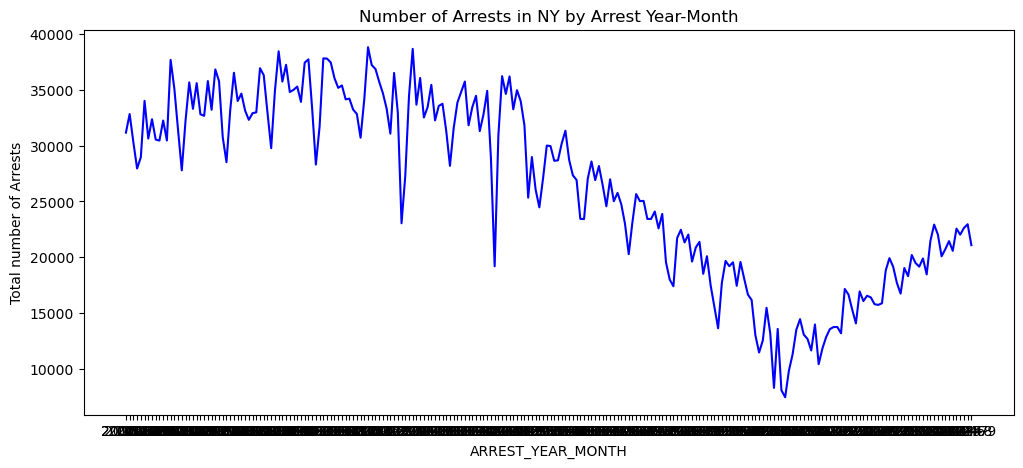

In [36]:
plt.figure(figsize=(12, 5))
ARREST_YEAR_MONTH_df = pd.DataFrame(NYPD_Arrests_df["ARREST_YEAR_MONTH"].value_counts(dropna=False)).reset_index().sort_values(by="ARREST_YEAR_MONTH")
ARREST_YEAR_MONTH_df = ARREST_YEAR_MONTH_df.sort_values('ARREST_YEAR_MONTH')

plt.plot(ARREST_YEAR_MONTH_df["ARREST_YEAR_MONTH"], ARREST_YEAR_MONTH_df["count"], color='blue')
plt.title("Number of Arrests in NY by Arrest Year-Month")
plt.xlabel("ARREST_YEAR_MONTH")
plt.ylabel("Total number of Arrests")
plt.show()

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Number of Arrests in NY by Arrest Year')

Text(0.5, 0, 'ARREST_YEAR')

Text(0, 0.5, 'Total number of Arrests')

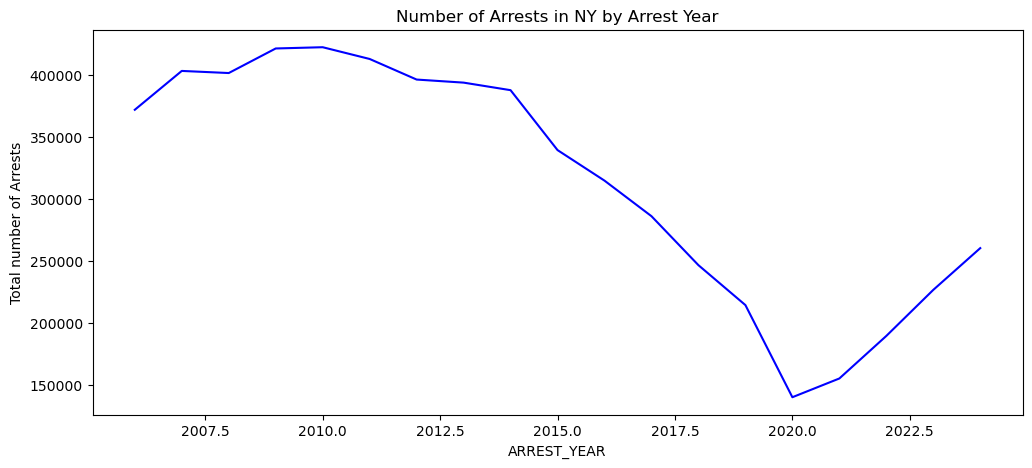

In [35]:
plt.figure(figsize=(12, 5))
ARREST_YEAR_df = pd.DataFrame(NYPD_Arrests_df["ARREST_YEAR"].value_counts(dropna=False)).reset_index().sort_values(by="ARREST_YEAR")
ARREST_YEAR_df = ARREST_YEAR_df.sort_values('ARREST_YEAR')

plt.plot(ARREST_YEAR_df["ARREST_YEAR"], ARREST_YEAR_df["count"], color='blue')
plt.title("Number of Arrests in NY by Arrest Year")
plt.xlabel("ARREST_YEAR")
plt.ylabel("Total number of Arrests")
plt.show()

### PD_CD and PD_DESC
- **PD_CD:** Three digit internal classification code (more granular than Key Code)
- **PD_DESC:** Description of internal classification corresponding with PD code (more granular than Offense Description)

In [25]:
len(NYPD_Arrests_df)
NYPD_Arrests_df["PD_CD"].nunique()
NYPD_Arrests_df["PD_DESC"].nunique()
pd.DataFrame(NYPD_Arrests_df.groupby(by=["PD_CD"])["PD_DESC"].agg(set)).head(10)

5986025

347

447

,PD_DESC
PD_CD,
0.0,{nan}
1.0,"{F.O.A. NON-SUPPORT, F.C.A. NON SUPPORT}"
2.0,{F.C.A. ORDER OF PROTECTION}
4.0,{F.C.A. P.I.N.O.S.}
9.0,"{nan, F.C.A. UNCLASSIFIED}"
11.0,"{NY CITY,TRAFFIC SUMMONS WARRANT}"
12.0,"{NYC UNCLASSIFIED WARRANT, NY CITY,UNCLASSIFIED WARRANT}"
15.0,"{FUGITIVE,FROM OTHER JURISDICTION IN NY STATE, FUGITIVE/OTHER JURISDICTION NYS}"
16.0,"{FUGITIVE,FROM OTHER STATES, FUGITIVE/OTHER STATES}"


### KY_CD and OFNS_DESC
- **KY_CD:** Three digit internal classification code (more general category than PD code)
- **OFNS_DESC:** Description of internal classification corresponding with KY code (more general category than PD description)

In [26]:
len(NYPD_Arrests_df)
NYPD_Arrests_df["KY_CD"].nunique()
NYPD_Arrests_df["OFNS_DESC"].nunique()
pd.DataFrame(NYPD_Arrests_df.groupby(by=["KY_CD"])["OFNS_DESC"].agg(set)).head(10)

5986025

76

90

,OFNS_DESC
KY_CD,
101.0,"{MURDER & NON-NEGL. MANSLAUGHTE, MURDER & NON-NEGL. MANSLAUGHTER}"
102.0,{HOMICIDE-NEGLIGENT-VEHICLE}
103.0,"{HOMICIDE-NEGLIGENT,UNCLASSIFIE, HOMICIDE-NEGLIGENT,UNCLASSIFIED}"
104.0,{RAPE}
105.0,{ROBBERY}
106.0,{FELONY ASSAULT}
107.0,{BURGLARY}
109.0,{GRAND LARCENY}
110.0,{GRAND LARCENY OF MOTOR VEHICLE}


<Figure size 1000x1000 with 0 Axes>

<AxesSubplot:>

<BarContainer object of 76 artists>

Text(0.5, 1.0, 'KY_CD')

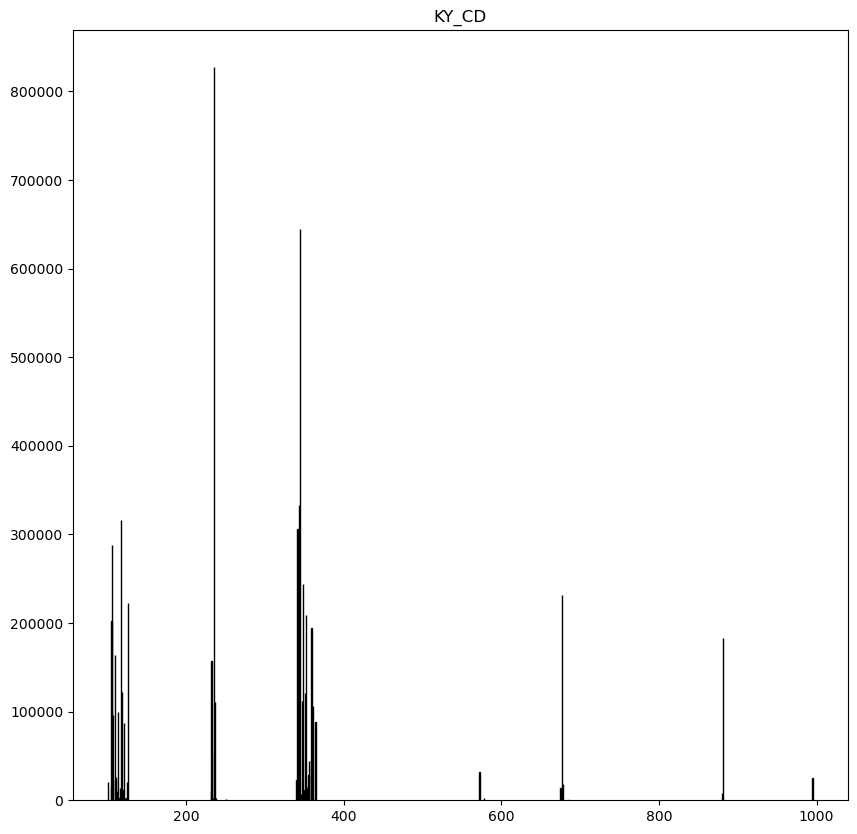

In [39]:
lst_vals = ['KY_CD']
plt.figure(figsize=(10, 10))
for index, val in enumerate(lst_vals):
    df = pd.DataFrame(NYPD_Arrests_df[val].value_counts(dropna=False)).reset_index().sort_values(by=val)
    df = df[~df[val].isna()]
    plt.subplot(len(lst_vals), 1, index + 1)
    plt.bar(df[val], df["count"], color='blue', edgecolor='black', width=0.35)
    plt.title(val)

### AGE_GROUP, PERP_SEX and PERP_RACE
- **AGE_GROUP:** Perpetrator’s age within a category
- **PERP_SEX:** Perpetrator’s sex description
- **PERP_RACE:** Perpetrator’s race description

In [68]:
NYPD_Arrests_df['AGE_GROUP'].value_counts(dropna=False)
list(NYPD_Arrests_df['AGE_GROUP'].unique())

AGE_GROUP
25-44    2874418
18-24    1491336
45-64    1115032
<18       447699
65+        57345
          ...   
640            1
212            1
200            1
954            1
338            1
Name: count, Length: 92, dtype: int64

['25-44',
 '45-64',
 '<18',
 '18-24',
 '65+',
 '1942',
 '1928',
 '1916',
 '1937',
 '2007',
 '1042',
 '2000',
 '1947',
 '1918',
 '1953',
 '1998',
 '1948',
 '1048',
 '1024',
 '1018',
 '929',
 '935',
 '1922',
 '937',
 '918',
 '927',
 '938',
 '928',
 '940',
 '926',
 '931',
 '924',
 '942',
 '941',
 '930',
 '932',
 '922',
 '943',
 '934',
 '945',
 '948',
 '955',
 '895',
 '936',
 '812',
 '923',
 '808',
 '317',
 '909',
 '949',
 '231',
 '896',
 '914',
 '709',
 '640',
 '951',
 '925',
 '212',
 '200',
 '954',
 '314',
 '723',
 '947',
 '959',
 '309',
 '921',
 '446',
 '330',
 '944',
 '910',
 '912',
 '320',
 '894',
 '323',
 nan,
 '965',
 '339',
 'UNKNOWN',
 '194',
 '946',
 '956',
 '708',
 '352',
 '920',
 '816',
 '316',
 '939',
 '237',
 '952',
 '933',
 '740',
 '338']

<BarContainer object of 5 artists>

Text(0.5, 1.0, 'Total Number of Arrests by Age Group')

Text(0.5, 0, 'Age Group')

Text(0, 0.5, 'Total number of Arrests')

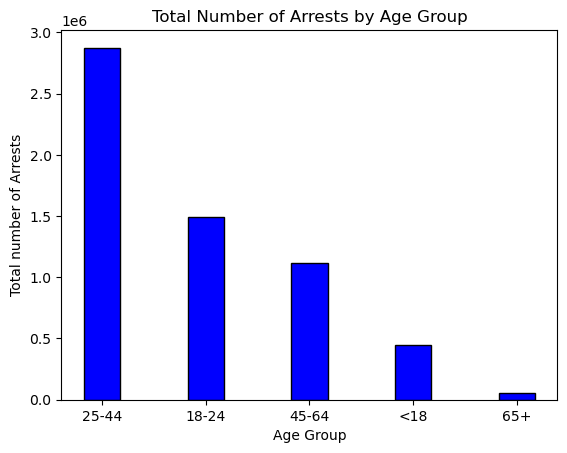

5

,AGE_GROUP,count
0,25-44,2874418
1,18-24,1491336
2,45-64,1115032
3,<18,447699
4,65+,57345


In [70]:
#Preprocessing:- Had to remove some age groups that didn't make any sense
df = pd.DataFrame(NYPD_Arrests_df['AGE_GROUP'].value_counts(dropna=False)).reset_index()
df = df[df["count"] > 17]
plt.bar(df["AGE_GROUP"], df["count"], color='blue', edgecolor='black', width=0.35)
plt.title("Total Number of Arrests by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total number of Arrests")
plt.show()

len(df)
df

<Figure size 2500x2500 with 0 Axes>

<AxesSubplot:>

<BarContainer object of 3 artists>

Text(0.5, 1.0, 'PERP_SEX')

Text(0.5, 1.0, 'Total Number of Arrests by PERP_SEX')

Text(0.5, 0, 'PERP_SEX')

Text(0, 0.5, 'Total number of Arrests')

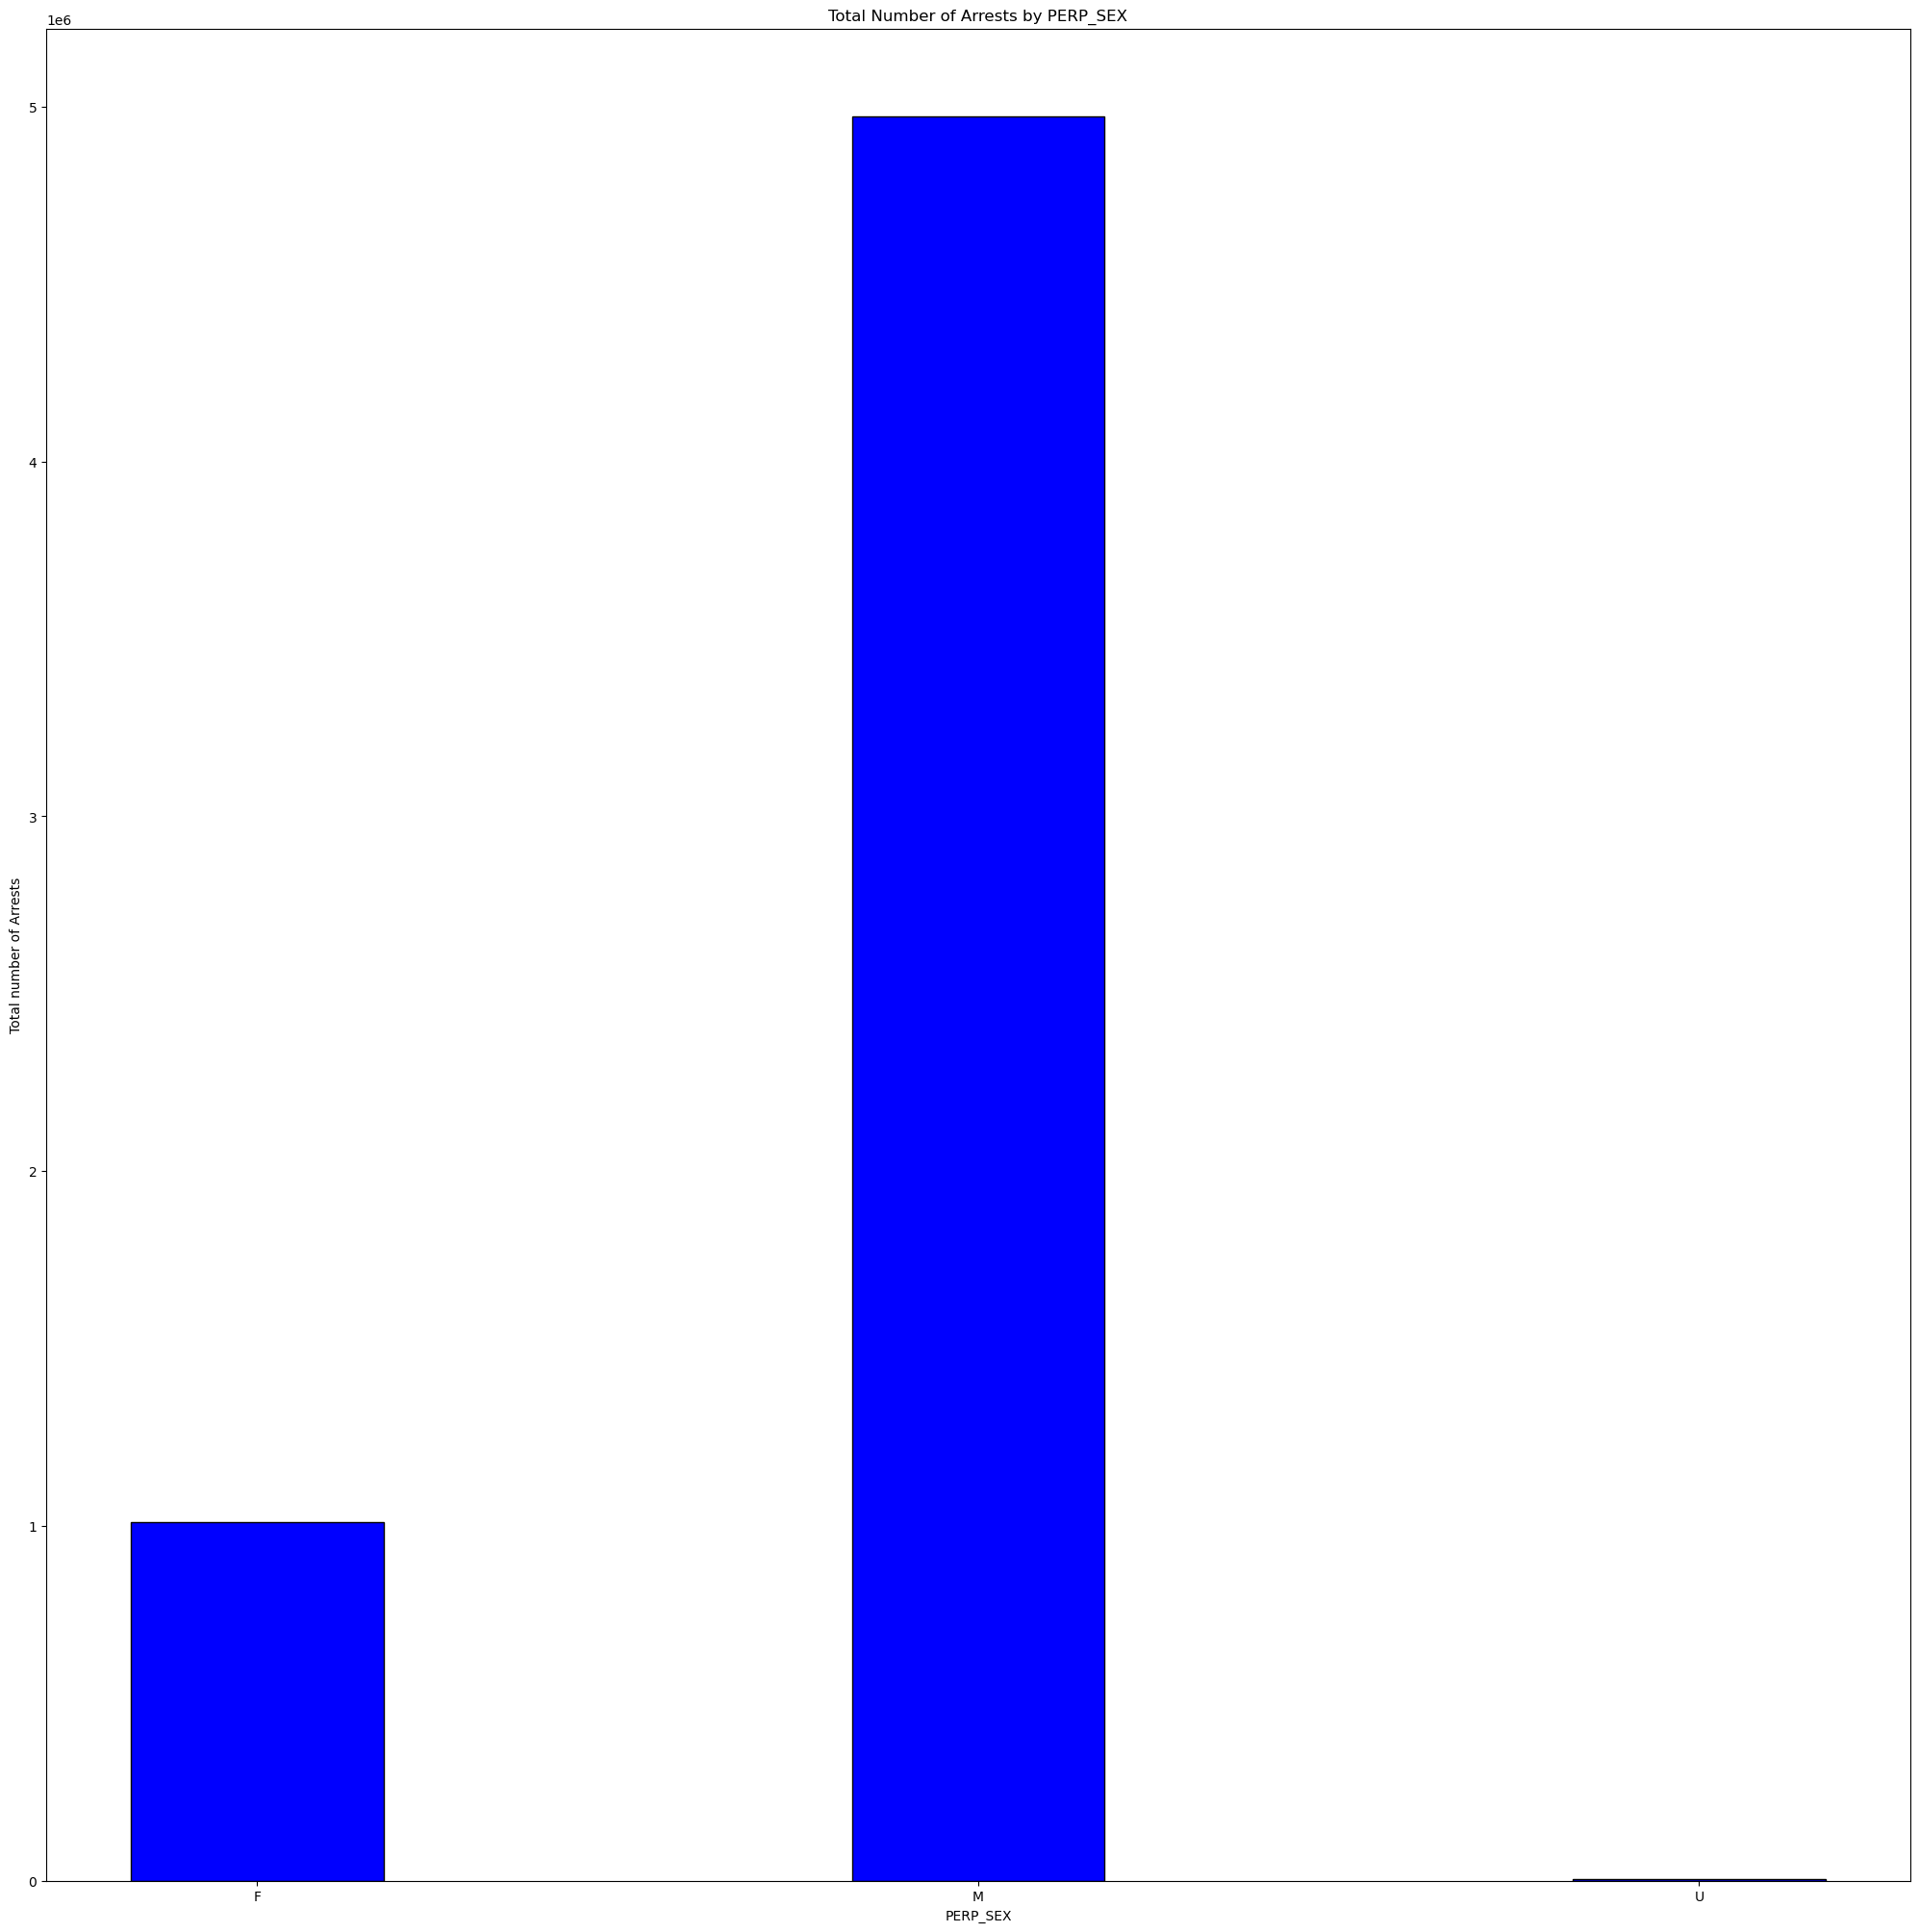

In [72]:
lst_vals = ['PERP_SEX']
plt.figure(figsize=(25, 25))
for index, val in enumerate(lst_vals):
    df = pd.DataFrame(NYPD_Arrests_df[val].value_counts(dropna=False)).reset_index().sort_values(by=val)
    df = df[~df[val].isna()]
    plt.subplot(len(lst_vals), 1, index + 1)
    plt.bar(df[val], df["count"], color='blue', edgecolor='black', width=0.35)
    plt.title(val)
    plt.title("Total Number of Arrests by " + val)
    plt.xlabel(val)
    plt.ylabel("Total number of Arrests")
    plt.show()

<Figure size 2500x1500 with 0 Axes>

<AxesSubplot:>

<BarContainer object of 8 artists>

Text(0.5, 1.0, 'PERP_RACE')

Text(0.5, 1.0, 'Total Number of Arrests by PERP_RACE')

Text(0.5, 0, 'PERP_RACE')

Text(0, 0.5, 'Total number of Arrests')

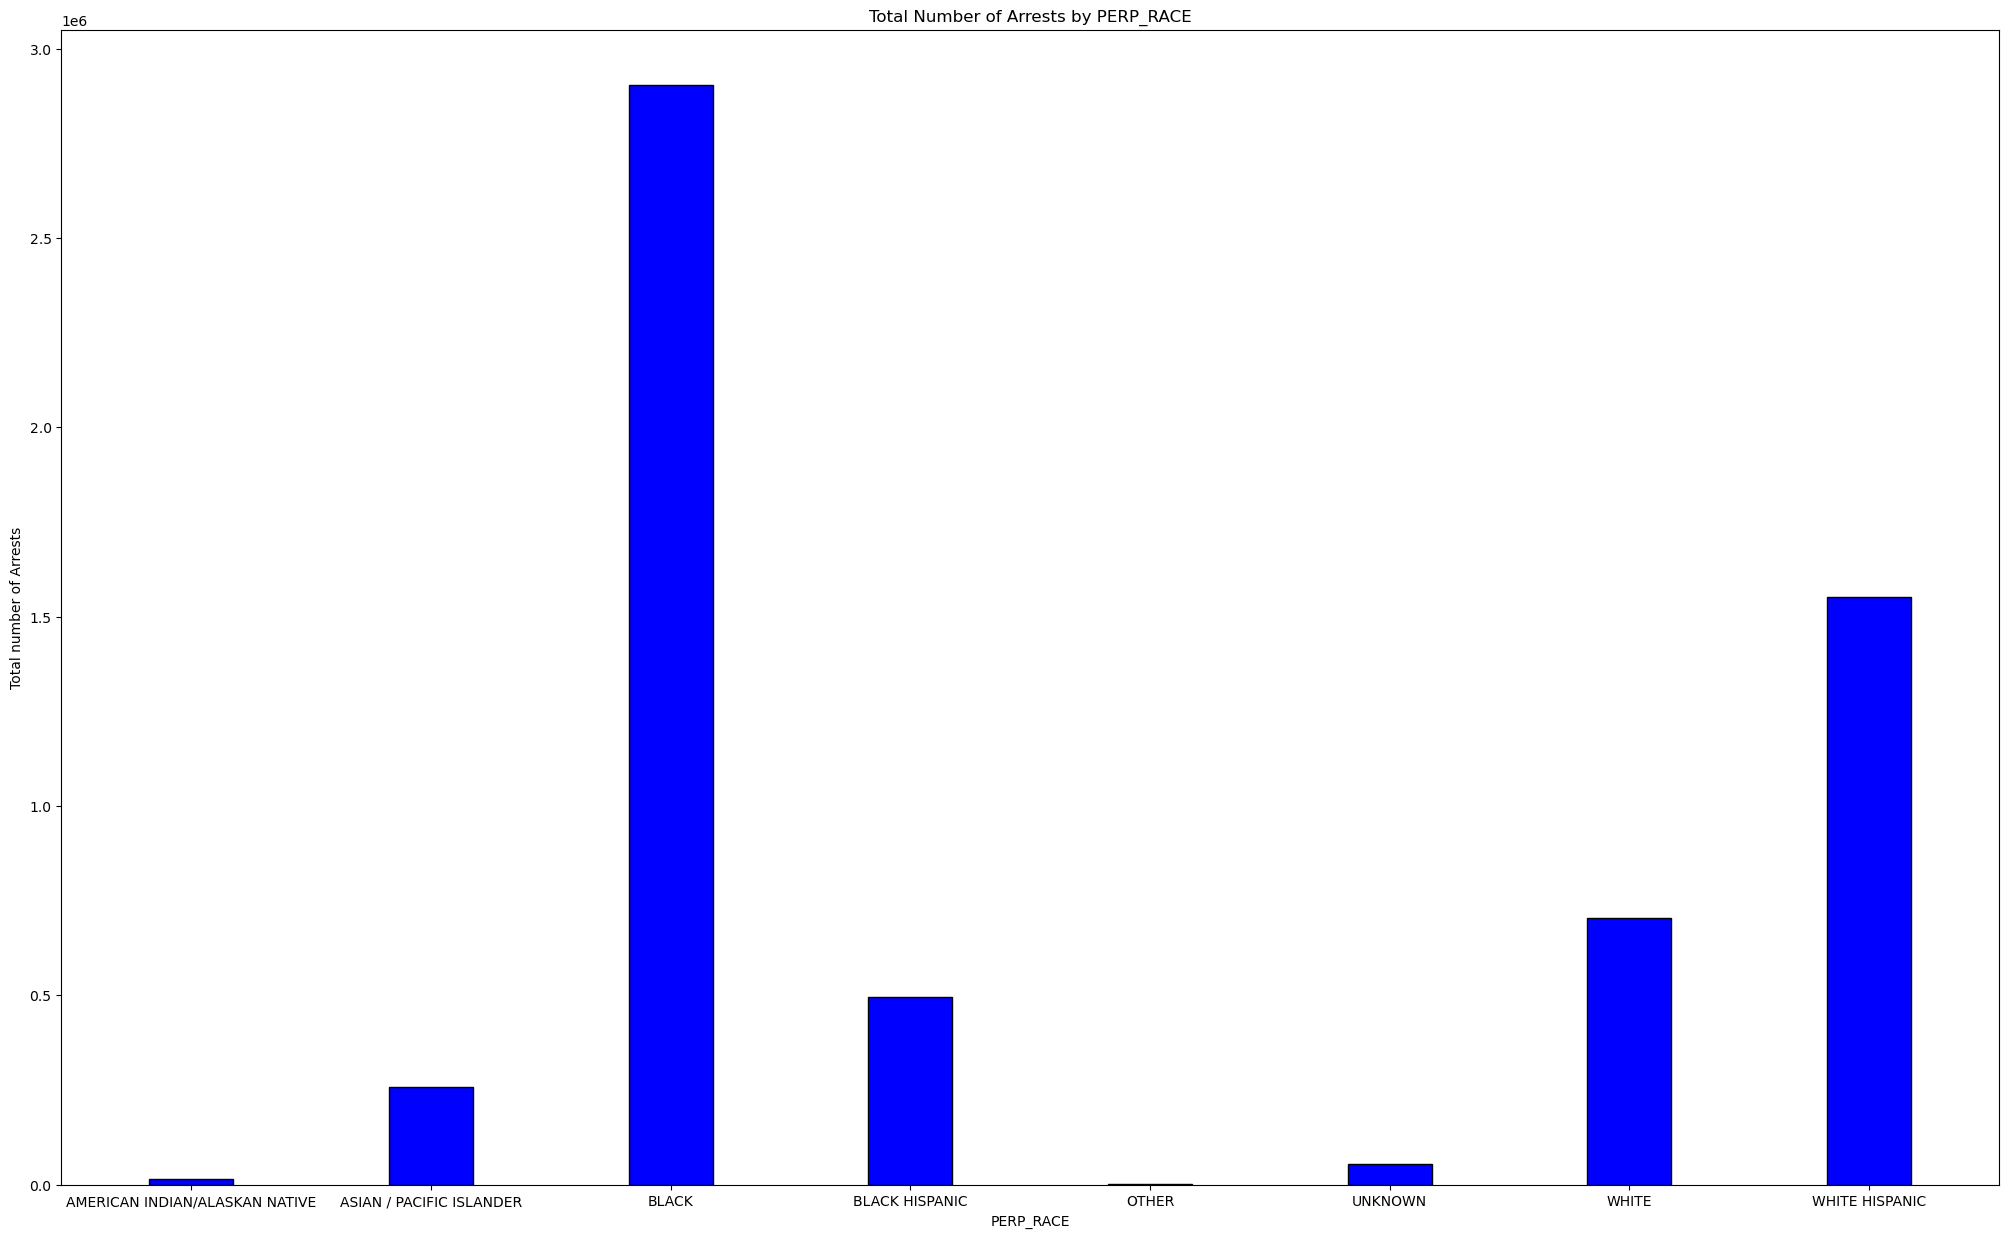

In [74]:
lst_vals = ['PERP_RACE']
plt.figure(figsize=(25, 15))
for index, val in enumerate(lst_vals):
    df = pd.DataFrame(NYPD_Arrests_df[val].value_counts(dropna=False)).reset_index().sort_values(by=val)
    df = df[~df[val].isna()]
    plt.subplot(len(lst_vals), 1, index + 1)
    plt.bar(df[val], df["count"], color='blue', edgecolor='black', width=0.35)
    plt.title(val)
    plt.title("Total Number of Arrests by " + val)
    plt.xlabel(val)
    plt.ylabel("Total number of Arrests")
    plt.show()
    

In [57]:
#Preprocessing - Keep only the valid age groups to get insights
valid_age_group_lst = ['25-44', '18-24', '45-64', '<18', '65+']
len(NYPD_Arrests_df)
df = NYPD_Arrests_df[NYPD_Arrests_df['AGE_GROUP'].isin(valid_age_group_lst)]
len(df)
pd.DataFrame(df.groupby(by=['AGE_GROUP','PERP_SEX','PERP_RACE'])["ARREST_KEY"].count()).head(50)

5986025

5985830

ARREST_KEY
AGE_GROUP PERP_SEX PERP_RACE                                 
18-24     F        AMERICAN INDIAN/ALASKAN NATIVE         454
                   ASIAN / PACIFIC ISLANDER              8448
                   BLACK                               131102
                   BLACK HISPANIC                       18474
                   OTHER                                   35
                   UNKNOWN                               1683
                   WHITE                                28681
                   WHITE HISPANIC                       63359
          M        AMERICAN INDIAN/ALASKAN NATIVE        3110
                   ASIAN / PACIFIC ISLANDER             48010
                   BLACK                               592870
                   BLACK HISPANIC                      122103
                   OTHER                                  326
                   UNKNOWN                              13288
                   WHITE                               119335
                   WHITE HISPANIC                      339428
          U        AMERICAN INDIAN/ALASKAN NATIVE           3
                   ASIAN / PACIFIC ISLANDER                42
                   BLACK                                  237
                   BLACK HISPANIC                          69
                   UNKNOWN                                104
                   WHITE                                   35
                   WHITE HISPANIC                         140
25-44     F        AMERICAN INDIAN/ALASKAN NATIVE        1111
                   ASIAN / PACIFIC ISLANDER             27109
                   BLACK                               228506
                   BLACK HISPANIC                       32449
                   OTHER                                   65
                   UNKNOWN                               3198
                   WHITE                                70409
                   WHITE HISPANIC                      121825
          M        AMERICAN INDIAN/ALASKAN NATIVE        5618
                   ASIAN / PACIFIC ISLANDER            102937
                   BLACK                              1096674
                   BLACK HISPANIC                      201611
                   OTHER                                  613
                   UNKNOWN                              24555
                   WHITE                               290825
                   WHITE HISPANIC                      664907
          U        AMERICAN INDIAN/ALASKAN NATIVE           4
                   ASIAN / PACIFIC ISLANDER                82
                   BLACK                                  786
                   BLACK HISPANIC                         187
                   UNKNOWN                                303
                   WHITE                                  170
                   WHITE HISPANIC                         474
45-64     F        AMERICAN INDIAN/ALASKAN NATIVE         379
                   ASIAN / PACIFIC ISLANDER             13682
                   BLACK                                88386
                   BLACK HISPANIC                       10113

In [ ]:
'X_COORD_CD',
 'Y_COORD_CD',
 'Latitude',
 'Longitude',
 'Lon_Lat'


X_COORD_CD
Midblock X-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)
Y_COORD_CD
Midblock Y-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)
Latitude
Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)
Longitude
Longitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)

In [60]:
list(NYPD_Arrests_df.columns)

['ARREST_KEY',
 'ARREST_DATE',
 'PD_CD',
 'PD_DESC',
 'KY_CD',
 'OFNS_DESC',
 'LAW_CODE',
 'LAW_CAT_CD',
 'ARREST_BORO',
 'ARREST_PRECINCT',
 'JURISDICTION_CODE',
 'AGE_GROUP',
 'PERP_SEX',
 'PERP_RACE',
 'X_COORD_CD',
 'Y_COORD_CD',
 'Latitude',
 'Longitude',
 'Lon_Lat',
 'ARREST_YEAR',
 'ARREST_MONTH',
 'ARREST_YEAR_MONTH']

In [62]:
NYPD_Arrests_df[['X_COORD_CD',
 'Y_COORD_CD',
 'Latitude',
 'Longitude']]

,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,988210.0,218129.0,40.765390,-73.985702
1,997897.0,175676.0,40.648859,-73.950820
2,1003509.0,185018.0,40.674496,-73.930571
3,1011755.0,250279.0,40.853598,-73.900577
4,1011456.0,194092.0,40.699373,-73.901881
...,...,...,...,...
5986020,1010256.0,248770.0,40.849453,-73.906000
5986021,983555.0,204888.0,40.729056,-74.002507
5986022,1007005.0,195927.0,40.704433,-73.917928
5986023,986732.0,211747.0,40.747873,-73.991040


<AxesSubplot:xlabel='X_COORD_CD', ylabel='Y_COORD_CD'>

Text(0.5, 1.0, 'Latitude vs. Longitude')

Text(0.5, 0, 'Longitude')

Text(0, 0.5, 'Latitude')

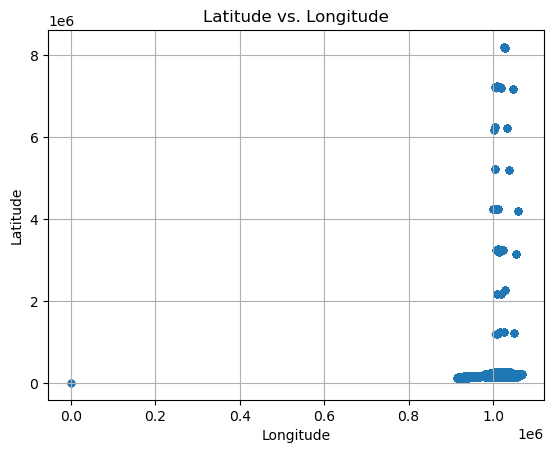

In [66]:
NYPD_Arrests_df.plot(x='X_COORD_CD', y='Y_COORD_CD', kind='scatter', alpha=0.7)

plt.title('Latitude vs. Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

Text(0.5, 1.0, 'Latitude vs. Longitude')

Text(0.5, 0, 'Longitude')

Text(0, 0.5, 'Latitude')

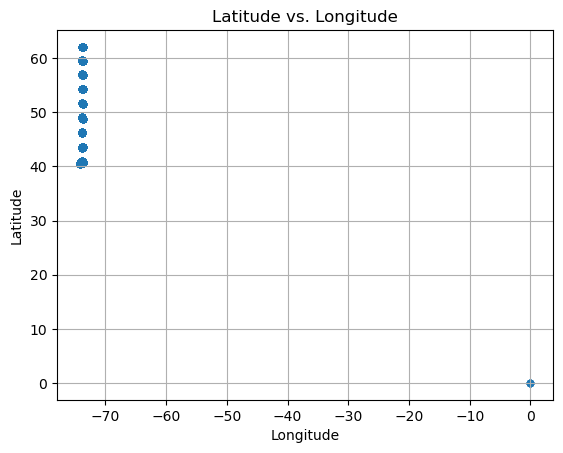

In [63]:
NYPD_Arrests_df.plot(x='Longitude', y='Latitude', kind='scatter', alpha=0.7)

plt.title('Latitude vs. Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

<Figure size 2000x2000 with 0 Axes>

Text(0.5, 1.0, 'Latitude vs. Longitude')

Text(0.5, 0, 'Longitude')

Text(0, 0.5, 'Latitude')

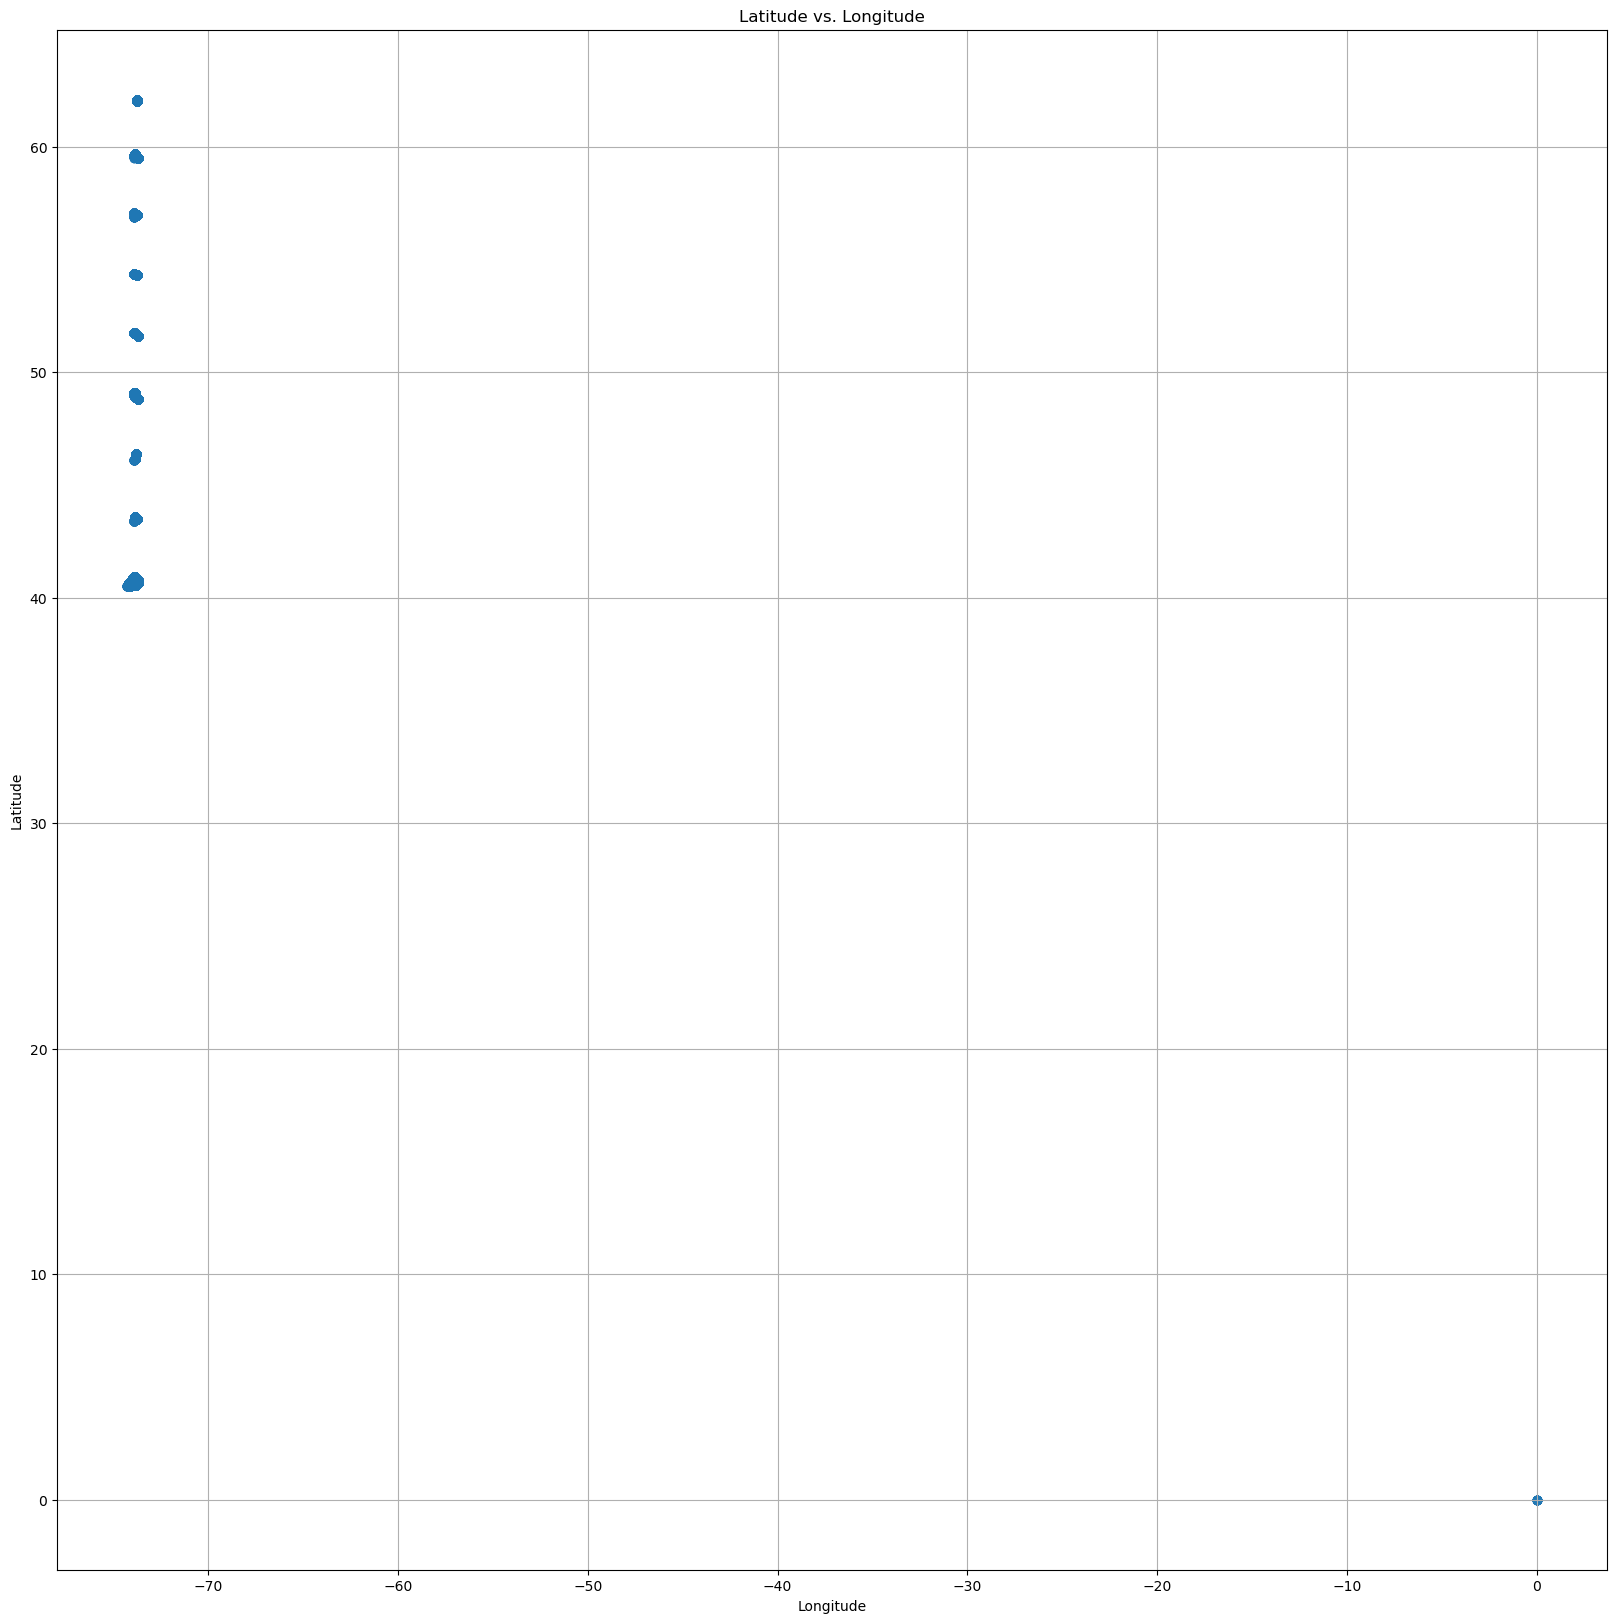

In [58]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

# Create a scatter plot
plt.figure(figsize=(20, 20))
plt.scatter(NYPD_Arrests_df['Longitude'], NYPD_Arrests_df['Latitude'])

plt.title('Latitude vs. Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [10]:
#Get a list of all the columns
list(NYPD_Arrests_df.columns)

[
 'LAW_CODE',
 'LAW_CAT_CD',
 'ARREST_BORO',
 'ARREST_PRECINCT',
 'JURISDICTION_CODE',

 'X_COORD_CD',
 'Y_COORD_CD',
 'Latitude',
 'Longitude',
 'Lon_Lat']


['ARREST_KEY',
 'ARREST_DATE',
 'PD_CD',
 'PD_DESC',
 'KY_CD',
 'OFNS_DESC',
 'LAW_CODE',
 'LAW_CAT_CD',
 'ARREST_BORO',
 'ARREST_PRECINCT',
 'JURISDICTION_CODE',
 'AGE_GROUP',
 'PERP_SEX',
 'PERP_RACE',
 'X_COORD_CD',
 'Y_COORD_CD',
 'Latitude',
 'Longitude',
 'Lon_Lat']